In [1]:
import numpy as np
import matplotlib.pyplot as plt

from evoscape.module_helper_functions import modules_from_txt
from evoscape.landscapes import CellDiff_Dataset_Landscape
import evoscape.landscape_visuals as vis
from evoscape.morphogen_regimes import mr_piecewise

import pandas as pd

from matplotlib import colormaps
from matplotlib import style
style.use('default')

In [2]:

plt.rcParams.update({'figure.dpi': 200})  # Change to 200 for high res figures
plt.rcParams.update({'font.size': 15})  
plt.rcParams['axes.grid'] = False

%load_ext autoreload


In [3]:
data_dir = '../alfyn_results_stage2/saved_files_8/CellDiff_Dataset_Landscape/'
file_name = data_dir + 'optimization_log.csv'

log = pd.read_csv(file_name, sep='\t', names=['Timecode', 'Init timecode', 'Fitness'], skiprows=1)
print(log.shape)

fitness_threshold = -0.55
print(np.sum(log['Fitness'] > fitness_threshold))
timecodes = log['Timecode'][log['Fitness'] > fitness_threshold]


def landscape_from_timecode(timecode, data_dir, gen, landscape_pars):
    filename = data_dir + timecode + '/' + timecode + '_module_list_' + str(gen) + '.txt'
    with open(filename, 'r') as f:
        module_list = modules_from_txt(filename)
    landscape = CellDiff_Dataset_Landscape(module_list, A0=landscape_pars['A0'], regime=mr_piecewise, n_regimes=5)
    return landscape

landscape_pars = {
    'A0': 0.005,
}
gen = 300

(241, 3)
59


In [4]:

# par_limits = {
#     'x': (-3.,3.),
#     'y': (-3., 3.),
#     'a': (0.5, 3.),
#     's': (0.5, 1.5),
# }
# 
# par_choice_values = {}
# 
# used_fp_types = (Node,)
# n_modules = 5
# start_module_list = [random.choice(used_fp_types).generate(par_limits,par_choice_values,
#                                                            immutable_pars_list=[], n_regimes=3) for i in range(n_modules)]
# 
# landscape = CellDiff_Dataset_Landscape(start_module_list, regime=mr_piecewise, morphogen_times=(2., 4.), A0=0.005)

In [5]:
# %autoreload
# 
# L = 4.
# npoints = 201
# q = np.linspace(-L, L, npoints)
# xx, yy = np.meshgrid(q,q, indexing = 'xy')
# 
# colors = ('gold', 'tab:green', 'tab:blue')
# 
# noise = 0.2
# ndt =200
# nt = 51
# ncells = 200
# time_pars = (0, 10, nt)
# 
# 
# #    t0=0, t1=1, t2=2, t3=3
# times = np.array((1., 2., 3.))-0.5
# 
# common_fig, common_ax = plt.subplots(1, 3, figsize=(13, 3))
# 
# 
# for i in range(len(timecodes)):
#     timecode = timecodes.iloc[i]
#     landscape = landscape_from_timecode(timecode, data_dir, gen, landscape_pars)
#     landscape.morphogen_times = np.arange(4, dtype='float')
#     
#     for it, t in enumerate(times): 
#         landscape.init_cells(ncells, 2, 0.5*noise)
#         traj, states = landscape.run_cells(*time_pars, noise, ndt=ndt, frozen=True, t_freeze=t)
#         props = np.zeros((3, nt))
#         for s, state in enumerate((2, 3, 4)):
#             props[s] = np.sum(states == state, axis=0)/ncells
#         
#         # fig, ax = vis.visualize_cell_states(landscape, xx, yy, t, 0)
#         # for cell in range(ncells):
#         #     ax.plot(traj[0, cell, :], traj[1, cell, :], color='k')
#         # plt.show()
#         
#         for s in range(3):
#             common_ax[it].plot(np.linspace(*time_pars), props[s], c=colors[s], lw=2.5, alpha=0.4)
#     
# for ax in common_ax:
#     ax.set_ylim(top=1.05)
# common_ax[1].set_yticklabels([])
# common_ax[2].set_yticklabels([])
# plt.show()

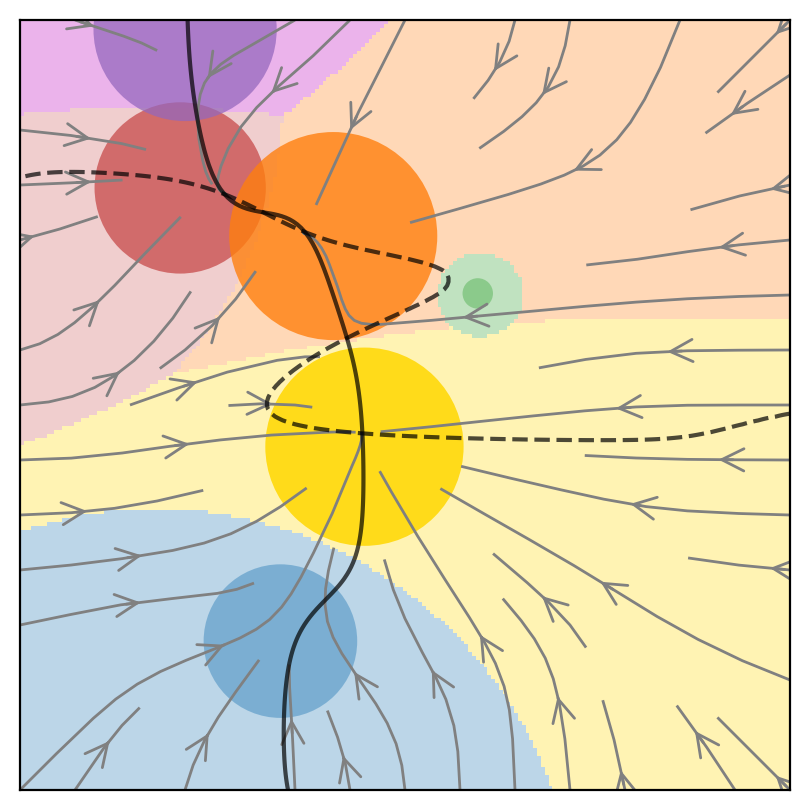

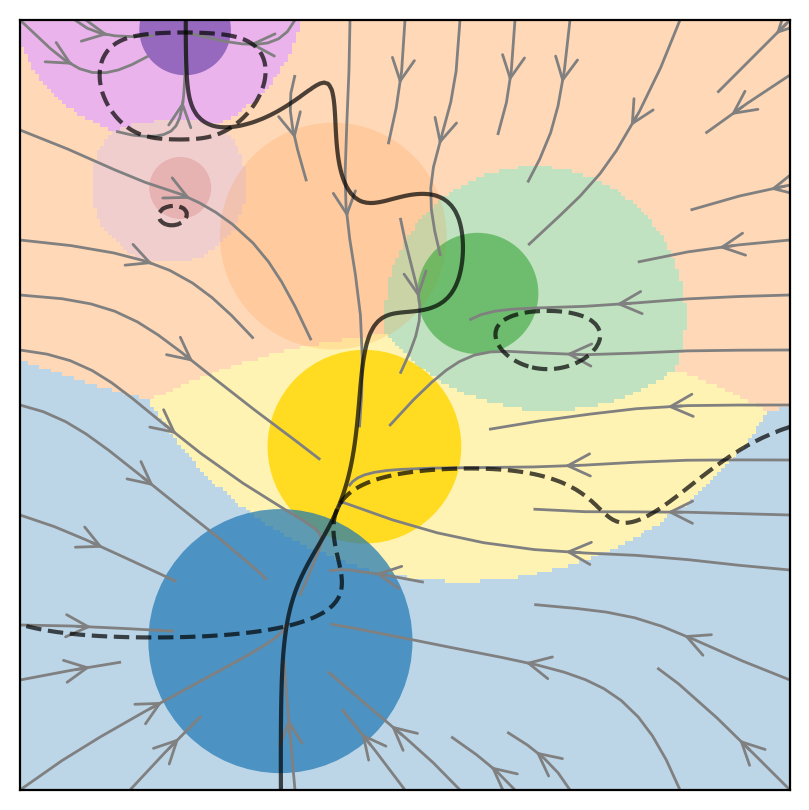

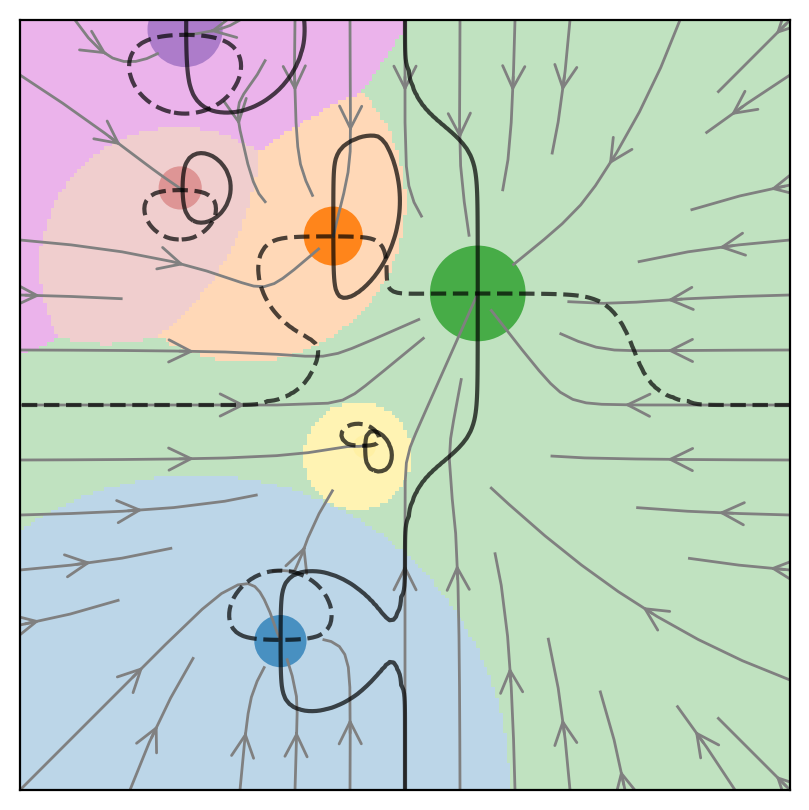

In [6]:
L = 5.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

for i in (3,):
    timecode = timecodes.iloc[i]
    landscape = landscape_from_timecode(timecode, data_dir, gen, landscape_pars)
    landscape.morphogen_times = np.arange(4, dtype='float')
    times = np.arange(5)-0.5
    times = (-0.5, 0.5, 1.5)
    for it, t in enumerate(times): 
        # landscape.init_cells(ncells, 2, 0.5*noise)
        # traj, states = landscape.run_cells(*time_pars, noise, ndt=ndt, frozen=True, t_freeze=t)
        # props = np.zeros((3, nt))
        # for s, state in enumerate((2, 3, 4)):
        #     props[s] = np.sum(states == state, axis=0)/ncells
        
        fig, ax = vis.visualize_cell_states(landscape, xx, yy, t, 0)
        # for cell in range(ncells):
        #     ax.plot(traj[0, cell, :], traj[1, cell, :], color='k')
        plt.show()

In [107]:
%autoreload

L = 4.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

colors = ('indianred', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'tab:purple')

noise = 0.2
ndt = 100
nt = 51
ncells = 500
time_pars = (0, 10, nt)

regime = 2
times = np.array((regime,))-0.5
init_state = 4
idx = np.where(np.load('idx_separate.npy'))[0]
# idx = np.where(np.load('idx_colocalized.npy'))[0]

# idx = np.arange(len(timecodes))

n_landscapes = len(idx)
print(n_landscapes)
props = np.zeros((n_landscapes, 6, nt))
# for i in range(len(timecodes)):

for i, id in enumerate(idx):
    print(i, id)
    timecode = timecodes.iloc[id]
    landscape = landscape_from_timecode(timecode, data_dir, gen, landscape_pars)
    landscape.morphogen_times = np.arange(4, dtype='float')
    sigma = landscape.module_list[init_state].s[regime]
    for it, t in enumerate(times): 
        landscape.init_cells(ncells, init_state, 0.5*noise)
        traj, states = landscape.run_cells(*time_pars, noise, ndt=ndt, frozen=True, t_freeze=t)
        # plt.figure(figsize=(2,2))
        # for c in range(100):
        #     plt.scatter(traj[0, c], traj[1, c], cmap='viridis', c=range(51), alpha=0.5, s=5, marker='.')
        # plt.show()
        # props = np.zeros((6, nt))
        for s in range(6):
            props[i, s, :] = np.sum(states == s, axis=0)/ncells
        
        # fig, ax = vis.visualize_cell_states(landscape, xx, yy, t, 0)
        # for cell in range(ncells):
        #     ax.plot(traj[0, cell, :], traj[1, cell, :], color='k')
        # plt.show()
        

36
0 1


/Users/victoria/Code/landscapes/src/evoscape/landscapes/landscape_class.py:271: RuntimeWarning: divide by zero encountered in divide
  -np.sum((coordinate.T - np.array((module.x, module.y))) ** 2, axis=1) / 2. / st ** 2) / st ** 2
/Users/victoria/Code/landscapes/src/evoscape/landscapes/landscape_class.py:270: RuntimeWarning: invalid value encountered in divide
  prob[:, i] = np.exp(


1 3
2 5
3 6
4 7
5 8
6 10
7 12
8 16
9 17
10 19
11 20
12 21
13 23
14 24
15 25
16 28
17 30
18 33
19 36
20 37
21 40
22 42
23 43
24 44
25 46
26 47
27 49
28 50
29 51
30 52
31 54
32 55
33 56
34 57
35 58


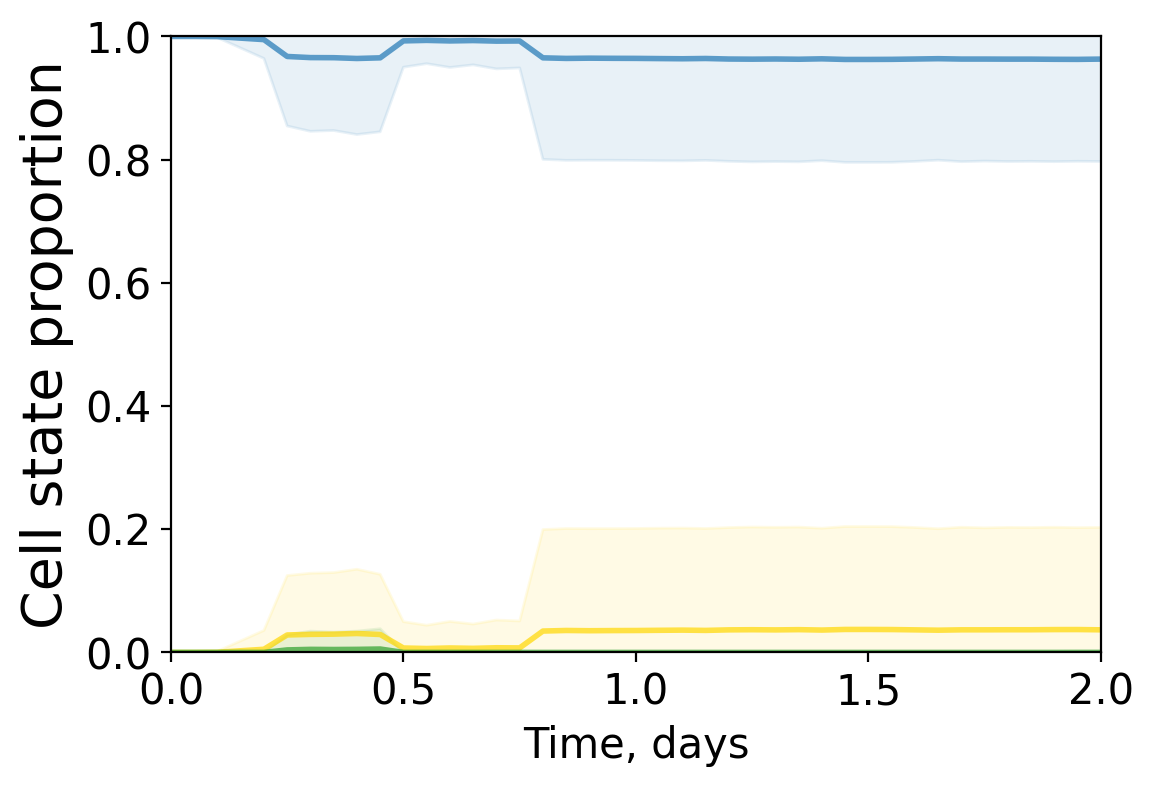

In [108]:
common_fig, common_ax = plt.subplots(1, 1, figsize=(6, 4))


props[:, init_state, 0] = 1.

for s in range(2,5):
    mean = np.mean(props[:, s, :], axis=0)
    std = np.std(props[:, s, :], axis=0)
    common_ax.plot(np.linspace(*time_pars)/4, mean, c=colors[s], lw=2., alpha=0.7)
    common_ax.fill_between(np.linspace(*time_pars)/4, mean-std, mean+std, color=colors[s], alpha=0.1)
    
common_ax.set_ylim(top=1.0, bottom=0)
plt.xlim((0,2))
# common_ax[1].set_yticklabels([])
# common_ax[2].set_yticklabels([])
plt.xlabel('Time, days')
plt.ylabel('Cell state proportion', fontsize=20)
plt.show()

In [76]:
len(props)

36

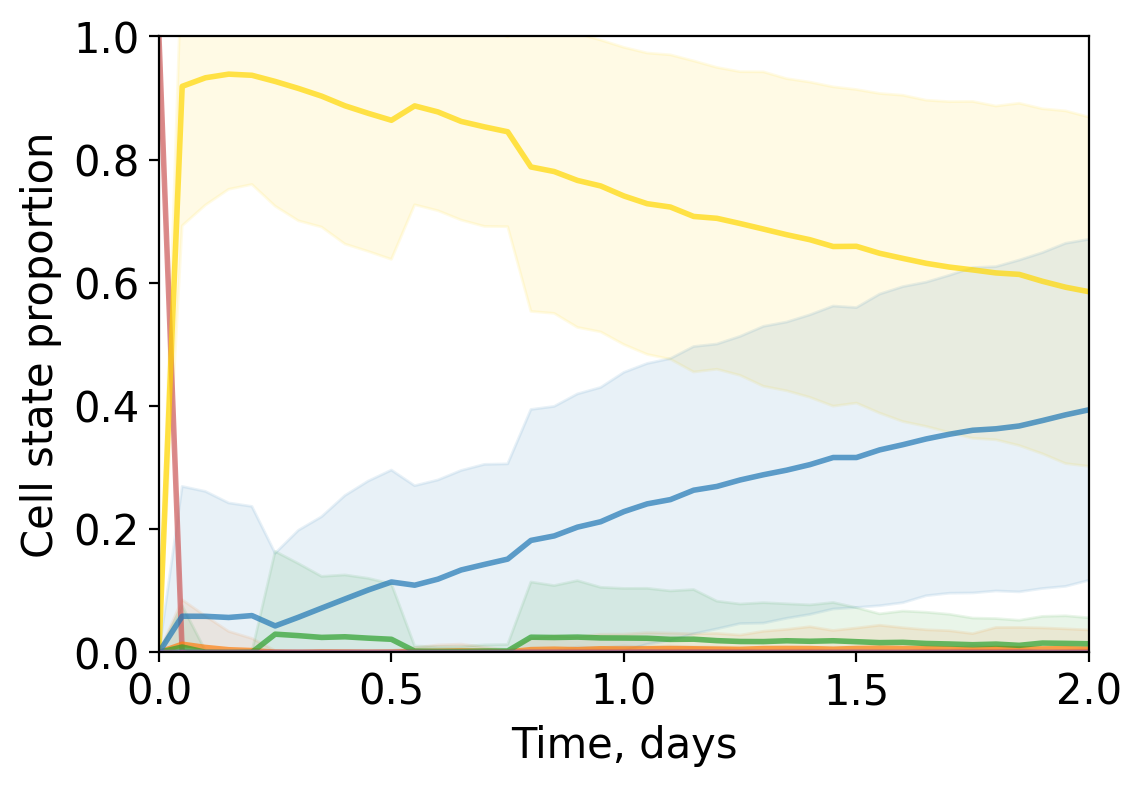

In [9]:
common_fig, common_ax = plt.subplots(1, 1, figsize=(6, 4))

for s in range(6):
    mean = np.mean(props[:, s, :], axis=0)
    std = np.std(props[:, s, :], axis=0)
    common_ax.plot(np.linspace(*time_pars)/4, mean, c=colors[s], lw=2., alpha=0.7)
    common_ax.fill_between(np.linspace(*time_pars)/4, mean-std, mean+std, color=colors[s], alpha=0.1)
    
common_ax.set_ylim(top=1.0, bottom=0)
plt.xlim((0,2))
# common_ax[1].set_yticklabels([])
# common_ax[2].set_yticklabels([])
plt.xlabel('Time, days')
plt.ylabel('Cell state proportion')
plt.show()

/Users/victoria/Code/landscapes/src/landscapes/landscapes/landscape_class.py:271: RuntimeWarning: divide by zero encountered in divide
  -np.sum((coordinate.T - np.array((module.x, module.y))) ** 2, axis=1) / 2. / st ** 2) / st ** 2
/Users/victoria/Code/landscapes/src/landscapes/landscapes/landscape_class.py:270: RuntimeWarning: invalid value encountered in divide
  prob[:, i] = np.exp(


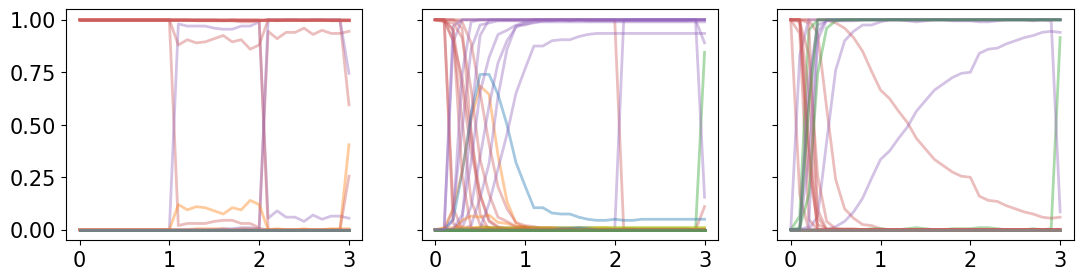

In [82]:
%autoreload

L = 4.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

colors = ('indianred', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'tab:purple')

noise = 0.2
ndt =200
nt = 31
ncells = 200
time_pars = (0, 3, nt)

times = np.array((0., 3., 4.))-0.5

common_fig, common_ax = plt.subplots(1, 3, figsize=(13, 3))

init_state = 0

# for i in range(len(timecodes)):
for i in range(10):

    timecode = timecodes.iloc[i]
    landscape = landscape_from_timecode(timecode, data_dir, gen, landscape_pars)
    landscape.morphogen_times = np.arange(4, dtype='float')
    
    for it, t in enumerate(times): 
        landscape.init_cells(ncells, init_state, 0.5*noise)
        traj, states = landscape.run_cells(*time_pars, noise, ndt=ndt, frozen=True, t_freeze=t)
        props = np.zeros((6, nt))
        for s, state in enumerate((0, 1, 2, 3, 4, 5)):
            props[s] = np.sum(states == state, axis=0)/ncells
        
        # fig, ax = vis.visualize_cell_states(landscape, xx, yy, t, 0)
        # for cell in range(ncells):
        #     ax.plot(traj[0, cell, :], traj[1, cell, :], color='k')
        # plt.show()
        
        for s in range(6):
            common_ax[it].plot(np.linspace(*time_pars), props[s], c=colors[s], lw=2., alpha=0.4)
    
for ax in common_ax:
    ax.set_ylim(top=1.05)
common_ax[1].set_yticklabels([])
common_ax[2].set_yticklabels([])
plt.show()

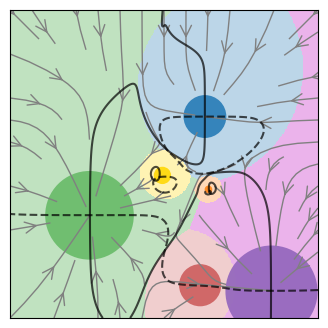

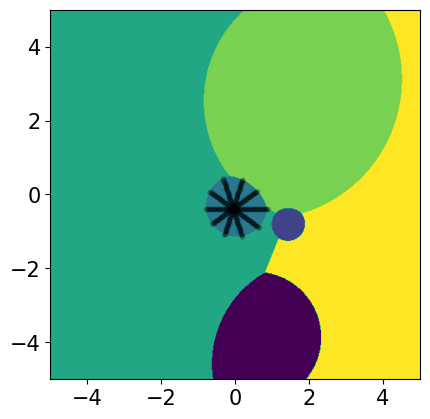

[0.  0.  0.  0.7 0.3 0. ]


In [134]:
def get_state_map(landscape, xx, yy, t, abs_threshold = 0.):
    cell_states = landscape.get_cell_states(t, np.array((xx.flatten(), yy.flatten())), abs_threshold=abs_threshold)
    return np.reshape(cell_states, xx.shape)


def neighbor_state_proportions(landscape, state_map, init_state, q, n_theta=100, n_r = 200, plot=False):
    
    x0 = landscape.module_list[init_state].x
    y0 = landscape.module_list[init_state].y
    dx = np.diff(q)[0]
    # x_ind = int(x0/dx)
    # y_ind = int(y0/dx)
    # x0 = q[x_ind]
    # y0 = q[y_ind]
    
    thetas = np.arange(0, 2*np.pi, np.pi/n_theta)
    neighb_counts = np.zeros(len(np.unique(state_map)))
    for theta in thetas:
        for r in np.linspace(0, 3, n_r+1):
            x = int((x0 + r * np.cos(theta) - np.min(q))/dx)
            y = int((y0 + r * np.sin(theta) - np.min(q))/dx)
            if x >= len(q) or y >= len(q):
                break
            current_state = state_map[y, x]
            if plot:
                plt.scatter(q[x], q[y], c='k', marker ='.', alpha=0.1)
            if current_state != init_state:
                neighb_counts[current_state] += 1
                break    
            # if current_state in (3, 4):
            #     neighb_counts[current_state] += 1
            #     break  
    proportions = neighb_counts/neighb_counts.sum()
    return proportions


L = 5.
npoints = 501
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

i = 5
t = 1.5

timecode = timecodes.iloc[i]
landscape = landscape_from_timecode(timecode, data_dir, gen, landscape_pars)
landscape.morphogen_times = np.arange(4, dtype='float')
state_map = get_state_map(landscape, xx, yy, t)
fig, ax = vis.visualize_cell_states(landscape, xx, yy, t, 0)
plt.show()

# cmap_state = ListedColormap(['grey', ] + list(colors))
#     norm_state = BoundaryNorm(np.arange(len(order_colors) + 1) - 1.5, cmap_state.N)
plt.imshow(state_map, extent=[-L, L, -L, L], origin='lower')

props = neighbor_state_proportions(landscape, state_map, 2, q, n_theta=5, plot=True)
plt.show()
print(props)

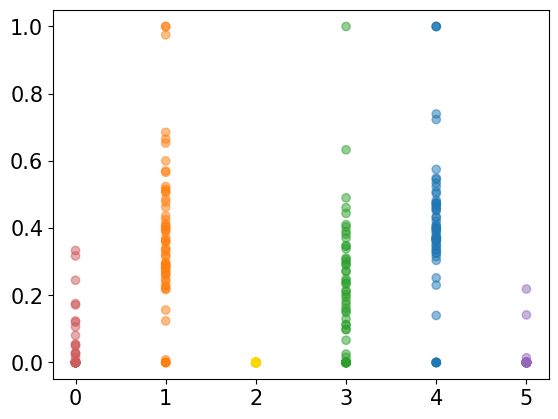

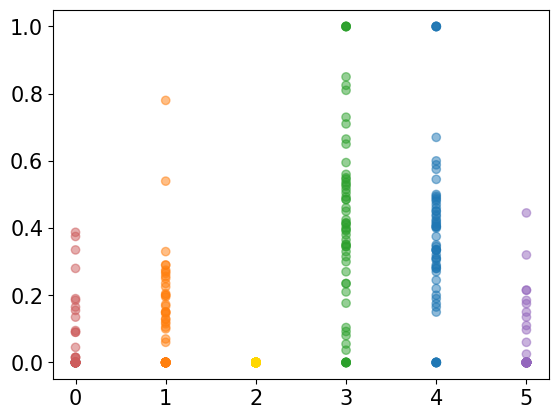

In [137]:
L = 5.
npoints = 501
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')



t = 0.5

for i in range(59):
    timecode = timecodes.iloc[i]
    landscape = landscape_from_timecode(timecode, data_dir, gen, landscape_pars)
    landscape.morphogen_times = np.arange(4, dtype='float')
    state_map = get_state_map(landscape, xx, yy, t)
    # fig, ax = vis.visualize_cell_states(landscape, xx, yy, t, 0)
    # plt.show()
    # plt.imshow(state_map, extent=[-L, L, -L, L], origin='lower')
    #     plt.show()

    props = neighbor_state_proportions(landscape, state_map, 2, q)
    plt.scatter(range(6), props, c=colors, alpha=0.5)
plt.show()
t = 1.5

for i in range(59):
    timecode = timecodes.iloc[i]
    landscape = landscape_from_timecode(timecode, data_dir, gen, landscape_pars)
    landscape.morphogen_times = np.arange(4, dtype='float')
    state_map = get_state_map(landscape, xx, yy, t)
    # fig, ax = vis.visualize_cell_states(landscape, xx, yy, t, 0)
    # plt.show()
    # plt.imshow(state_map, extent=[-L, L, -L, L], origin='lower')
    #     plt.show()

    props = neighbor_state_proportions(landscape, state_map, 2, q)
    plt.scatter(range(6), props, c=colors, alpha=0.5)
plt.show()
    # print(props)

In [139]:
def transform_coords(old_coords, origin=0, direction=2, left=None, bottom=None):
    coords = old_coords - old_coords[origin]   # move origin to module 0
    d = np.linalg.norm(coords[direction])  # distance to module 1
    x, y = coords[direction, 0], coords[direction, 1]
    R = np.array([[x, y], [-y, x]])/d
    coords = (R @ coords.T).T
    if bottom is not None:
        if coords[bottom, 1] > 0:    # the last module is below 0 
            coords[:, 1] *= -1.
    if left is not None:
        if coords[left, 0] > 0:
            coords[:, 0] *= -1.
    return coords



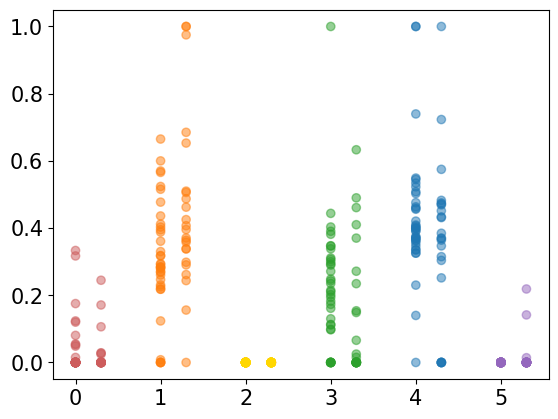

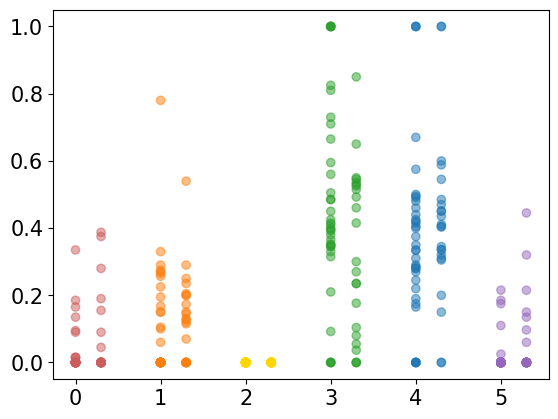

In [144]:
L = 5.
npoints = 501
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')
n_modules = 6


for t in (0.5, 1.5):

    for i in range(59):
        timecode = timecodes.iloc[i]
        landscape = landscape_from_timecode(timecode, data_dir, gen, landscape_pars)
        landscape.morphogen_times = np.arange(4, dtype='float')
        
        coords = np.zeros((n_modules, 2))
        for i, module in enumerate(landscape.module_list):
            coords[i] = module.x, module.y
    
        coords = transform_coords(coords, origin=2, direction=0, left=0, bottom=4)     ###
        if coords[3, 1] > 0:
            state_map = get_state_map(landscape, xx, yy, t)
            props = neighbor_state_proportions(landscape, state_map, 2, q)
            plt.scatter(range(6), props, c=colors, alpha=0.5)
        else:
            state_map = get_state_map(landscape, xx, yy, t)
            props = neighbor_state_proportions(landscape, state_map, 2, q)
            plt.scatter(np.arange(6)+0.3, props, c=colors, alpha=0.5)
    plt.show()

